Importing Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score,f1_score,roc_curve
from sklearn.metrics import roc_auc_score,auc,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#Loading the dataset to pandas Dataframe
credit_card_data=pd.read_csv('creditcard.csv')

In [ ]:
#First 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
#Last 5 rows of the dataset
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
79313,57966,-0.527571,-3.483241,-0.206444,-0.583181,-2.067419,-0.129826,0.454118,-0.149176,1.863281,...,0.691203,0.224470,-0.875993,0.204226,0.079542,0.029189,-0.109220,0.178251,912.79,0.0
79314,57966,-0.541422,1.341092,0.576882,0.733835,0.259657,-0.233639,0.712069,0.190731,-1.067355,...,0.189997,0.493842,-0.141807,-0.406546,-0.043605,-0.287510,0.045194,0.100293,49.33,0.0
79315,57966,-0.830218,0.971781,0.974916,-1.348723,-0.230572,-0.778253,0.395464,0.109896,0.234581,...,-0.115767,-0.335950,-0.068152,-0.109514,-0.204347,0.703500,-0.383530,-0.223780,14.60,0.0
79316,57966,1.104838,-1.141651,0.942113,-0.661271,-1.591229,-0.056758,-1.192570,0.275125,-0.447900,...,0.508825,1.146845,-0.117753,0.241582,0.212189,-0.054096,0.023744,0.026206,99.00,0.0
79317,57967,-3.560685,3.485801,-0.070146,2.191571,-0.429913,1.075498,-0.935968,-2.147517,-1.165398,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#dataset information
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79318 entries, 0 to 79317
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    79318 non-null  int64  
 1   V1      79318 non-null  float64
 2   V2      79318 non-null  float64
 3   V3      79318 non-null  float64
 4   V4      79318 non-null  float64
 5   V5      79318 non-null  float64
 6   V6      79318 non-null  float64
 7   V7      79318 non-null  float64
 8   V8      79318 non-null  float64
 9   V9      79318 non-null  float64
 10  V10     79318 non-null  float64
 11  V11     79317 non-null  float64
 12  V12     79317 non-null  float64
 13  V13     79317 non-null  float64
 14  V14     79317 non-null  float64
 15  V15     79317 non-null  float64
 16  V16     79317 non-null  float64
 17  V17     79317 non-null  float64
 18  V18     79317 non-null  float64
 19  V19     79317 non-null  float64
 20  V20     79317 non-null  float64
 21  V21     79317 non-null  float64
 22

In [ ]:
#Checking the number of missing values
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [ ]:
#Deleting the rows having missing values
credit_card_data=credit_card_data.dropna()
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
credit_card_data.shape

(79317, 31)

In [ ]:
#Distribution of legit Transaction and Fraudulent Transaction
credit_card_data['Class'].value_counts()

0.0    79126
1.0      191
Name: Class, dtype: int64

This dataset is highly unbalanced as it has very high legit transactions and less fraudulent transactions.So the less fraudulent transactions will be considered as legit ,which will result in wrong estimations of the machine learning model
0.0 -->Legit
1.0 -->fraudulent

In [ ]:
#Separating the data for analysis
legit=credit_card_data[credit_card_data.Class==0.0]
fraud=credit_card_data[credit_card_data.Class==1.0]

In [ ]:
#shape of the transactions
print(legit.shape)
print(fraud.shape)

(79126, 31)
(191, 31)


In [ ]:
#statistical Measures of the data
legit.Amount.describe()

count    79126.000000
mean        97.773259
std        269.765878
min          0.000000
25%          7.700000
50%         26.925000
75%         89.000000
max      19656.530000
Name: Amount, dtype: float64

25 percentile of transactions are less then that of 5.292500 percentage

In [ ]:
fraud.Amount.describe()

count     191.000000
mean       95.142251
std       214.122813
min         0.000000
25%         1.000000
50%         7.520000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

In [ ]:
#Compare the values for both the transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,37164.532164,-0.241928,-0.047016,0.701122,0.152361,-0.264869,0.100851,-0.097874,0.046041,0.000222,...,0.041575,-0.030941,-0.105670,-0.037430,0.007877,0.134383,0.026147,0.000715,0.002542,97.773259
1.0,32448.565445,-6.660361,4.685496,-8.847226,5.220761,-4.885698,-2.012799,-7.016277,3.141649,-3.135469,...,0.378115,0.779382,-0.158471,-0.220629,-0.091717,0.237570,0.096534,0.586070,0.053246,95.142251


Under-Sampling
Build a sample dataset containing similar distributions of normal transactions and fraudulent transactions
Number of fraudulent transactions is 52

In [ ]:
#Joining the random 52(fraudulent number) records from the legit transactions and taking the 52 actual fraudulent transactions,we will have 52 normal and 52 fraudlulent transactions
legit_sample = legit.sample(n=191)

Concatenating two dataframes

In [ ]:
#axis=0 values will be added row wise , dataframes will be added one by one
new_dataset=pd.concat([legit_sample,fraud],axis=0)

In [ ]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
18106,29194,0.923870,-1.277275,1.437579,1.017706,-1.790931,0.720023,-1.269088,0.397466,0.444937,...,-0.277232,-0.323458,-0.056435,0.033664,0.201298,-0.247149,0.100624,0.061300,144.00,0.0
33753,37372,1.009758,-0.459131,1.146001,0.671074,-0.723581,1.006935,-0.863321,0.529876,0.871393,...,-0.097417,-0.059000,0.091862,-0.260755,0.051683,0.416394,0.031235,0.009000,29.45,0.0
44090,41790,1.179899,-0.112121,1.258386,0.857832,-1.028939,-0.286066,-0.575562,0.032894,0.823718,...,-0.082997,-0.012955,0.022254,0.453474,0.277936,0.313897,0.021297,0.029042,10.00,0.0
66624,52137,-2.226352,1.589393,0.724507,-1.770999,-0.432781,-0.249872,0.121289,0.638004,1.165128,...,-0.281910,-0.268166,-0.014571,-0.359159,-0.252665,0.702865,0.045162,-0.328848,7.68,0.0
32065,36624,1.444487,-0.407333,-0.272213,-0.847397,-0.418644,-0.832951,-0.152657,-0.266202,-0.970224,...,-0.249036,-0.918845,0.009126,-0.494351,0.439480,-0.478870,-0.023734,0.009011,35.00,0.0


In [ ]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
76929,56806,0.016828,2.400826,-4.220360,3.462217,-0.624142,-1.294303,-2.986028,0.751883,-1.606672,...,0.285832,-0.771508,-0.265200,-0.873077,0.939776,-0.219085,0.874494,0.470434,1.00,1.0
77099,56887,-0.075483,1.812355,-2.566981,4.127549,-1.628532,-0.805895,-3.390135,1.019353,-2.451251,...,0.794372,0.270471,-0.143624,0.013566,0.634203,0.213693,0.773625,0.387434,5.00,1.0
77348,57007,-1.271244,2.462675,-2.851395,2.324480,-1.372245,-0.948196,-3.065234,1.166927,-2.268771,...,0.652941,0.081931,-0.221348,-0.523582,0.224228,0.756335,0.632800,0.250187,0.01,1.0
77387,57027,-2.335655,2.225380,-3.379450,2.178538,-3.568264,0.316814,-1.734948,1.449139,-1.980033,...,0.785540,0.297412,0.308536,-0.598416,-0.121850,-0.491018,0.701606,0.206966,444.17,1.0
77682,57163,-10.363049,4.543672,-9.795898,5.508003,-6.037156,-0.133493,-11.724346,-3.198346,-4.767842,...,-2.457145,1.687257,0.977178,-0.543369,-0.289125,-0.107586,0.330642,0.163577,1.00,1.0


In [ ]:
new_dataset['Class'].value_counts()

0.0    191
1.0    191
Name: Class, dtype: int64

In [ ]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,37565.528796,-0.333919,-0.214783,0.675210,0.084487,-0.217110,0.072657,-0.134563,0.003711,-0.010458,...,0.178949,0.022968,-0.140204,0.021473,-0.017964,0.20978,0.081387,-0.031606,0.007598,123.002408
1.0,32448.565445,-6.660361,4.685496,-8.847226,5.220761,-4.885698,-2.012799,-7.016277,3.141649,-3.135469,...,0.378115,0.779382,-0.158471,-0.220629,-0.091717,0.23757,0.096534,0.586070,0.053246,95.142251


The above output tells us that the original dataset and the new_dataset has almost the same value and nature od the dataset is same when we check the V1 column

Splitting the data into Features and Targets

In [ ]:
#X-Features, Y-Class(Label)
X=new_dataset.drop(columns='Class',axis=1) #Dropping the class column therefore axis=1
Y=new_dataset['Class']


In [ ]:
print(X)

        Time         V1        V2        V3        V4        V5        V6  \
18106  29194   0.923870 -1.277275  1.437579  1.017706 -1.790931  0.720023   
33753  37372   1.009758 -0.459131  1.146001  0.671074 -0.723581  1.006935   
44090  41790   1.179899 -0.112121  1.258386  0.857832 -1.028939 -0.286066   
66624  52137  -2.226352  1.589393  0.724507 -1.770999 -0.432781 -0.249872   
32065  36624   1.444487 -0.407333 -0.272213 -0.847397 -0.418644 -0.832951   
...      ...        ...       ...       ...       ...       ...       ...   
76929  56806   0.016828  2.400826 -4.220360  3.462217 -0.624142 -1.294303   
77099  56887  -0.075483  1.812355 -2.566981  4.127549 -1.628532 -0.805895   
77348  57007  -1.271244  2.462675 -2.851395  2.324480 -1.372245 -0.948196   
77387  57027  -2.335655  2.225380 -3.379450  2.178538 -3.568264  0.316814   
77682  57163 -10.363049  4.543672 -9.795898  5.508003 -6.037156 -0.133493   

              V7        V8        V9  ...       V20       V21       V22  \


In [ ]:
print(Y)

18106    0.0
33753    0.0
44090    0.0
66624    0.0
32065    0.0
        ... 
76929    1.0
77099    1.0
77348    1.0
77387    1.0
77682    1.0
Name: Class, Length: 382, dtype: float64


Split the data into Training data and Testing Data

In [ ]:
#Taking this from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,stratify=Y,random_state=42)
print(X.shape,X_train.shape,X_test.shape)
print(Y.shape,Y_train.shape,Y_test.shape)

(382, 30) (286, 30) (96, 30)
(382,) (286,) (96,)


These X_train,X_test,Y_train,Y_test are variables or arrays.
X_train contains all the values from the features and the Y_train will hold the corresponding labels
'same for test split'
when we mention 'Y' in stratify there will be evenly distributed X_train and X_test.
random_state-means how you want to run the code

In [ ]:
Y_test

77099    1.0
76609    1.0
10204    1.0
42945    1.0
27362    1.0
        ... 
74468    0.0
55475    0.0
57615    1.0
46918    1.0
17795    0.0
Name: Class, Length: 96, dtype: float64

(382, 30) (286, 30) (96, 30)
(382,) (286,) (96,)
Accuracy on Training data: 0.9825174825174825
X_test: (96, 30)
Y_test: (96,)
confusion Matrix
[[45  3]
 [ 1 47]]
classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.94      0.96        48
         1.0       0.94      0.98      0.96        48

    accuracy                           0.96        96
   macro avg       0.96      0.96      0.96        96
weighted avg       0.96      0.96      0.96        96

Accuracy: 95.83333333333334
Precision: 97.91666666666666
Recall: 94.0
F1 Score: 95.91836734693877


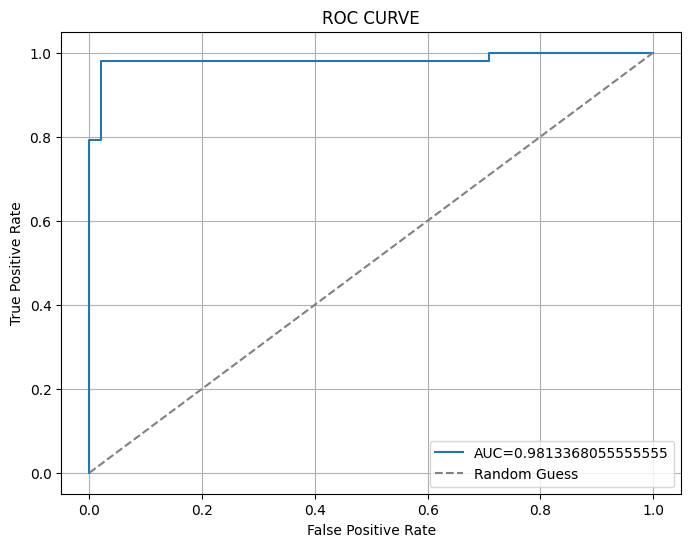

In [ ]:
#Logistic Regression with ROC curve
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score,f1_score,roc_curve
from sklearn.metrics import roc_auc_score,auc,accuracy_score
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,stratify=Y,random_state=42)
print(X.shape,X_train.shape,X_test.shape)
print(Y.shape,Y_train.shape,Y_test.shape)
model1=LogisticRegression(max_iter=1000)
#Training the Logistic regression Model with the Training data
#fit will fit our data to the Logistic regression Model
model1.fit(X_train, Y_train)

#Accuracy of Training data
Y_train_prediction1=model1.predict(X_train)
training_data_accuracy1=accuracy_score(Y_train_prediction1,Y_train)
print('Accuracy on Training data:',training_data_accuracy1)

#Shape for X_test and Y_test
print("X_test:",X_test.shape)
print("Y_test:",Y_test.shape)

#Accuracy of Test data
Y_prediction1=model1.predict(X_test)
# test_data_accuracy1=accuracy_score(Y_prediction1,Y_test)
# print('Accuracy on Testing data:',test_data_accuracy1)

#Confusion Matrix
cm=confusion_matrix(Y_test,Y_prediction1)
print("confusion Matrix")
print(cm)

#Classification Report
cr=classification_report(Y_test,Y_prediction1)
print("classification Report:")
print(cr)

lra = accuracy_score(Y_prediction1, Y_test) * 100
print('Accuracy:', lra)
lrp = precision_score(Y_prediction1, Y_test) * 100
print('Precision:', lrp)
lrr = recall_score(Y_prediction1, Y_test) * 100
print('Recall:', lrr)
lrf = f1_score(Y_prediction1, Y_test) * 100
print('F1 Score:', lrf)

y_pred_proba = model1._predict_proba_lr(X_test)[::,1]
fpr, tpr, _ = roc_curve(Y_test,y_pred_proba)
auc = roc_auc_score(Y_test, y_pred_proba)

#create ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.title("ROC CURVE")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.grid(True)
plt.show()


Model Training-Logistic Regression Model(As it is Binary Classification Problems)

Accuracy for test data: 0.9583333333333334


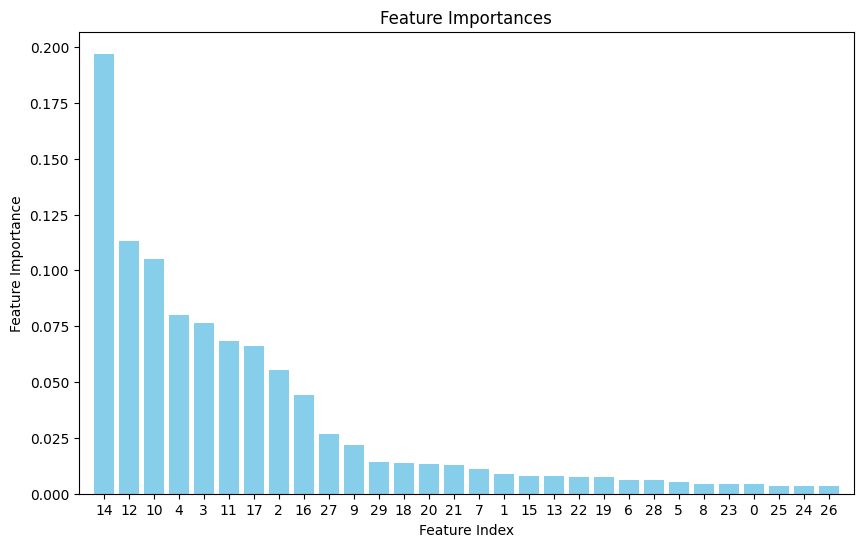

In [ ]:
#Random Forest Algorithm with Feature Importance plot

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest classifier on the training data
model3 = RandomForestClassifier(n_estimators=100, random_state=42)
model3.fit(X_train, Y_train)

#Predict labels for test data
Y_prediction3 = model3.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_prediction3)
print("Accuracy for test data:", accuracy)

# Get feature importances
importances = model3.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort feature indices `by importance in descending order

# Plot feature importances using the test data
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_test.shape[1]), importances[indices], color="skyblue", align="center")
plt.xticks(range(X_test.shape[1]), indices)
plt.xlabel("Feature Index")
plt.ylabel("Feature Importance")
plt.xlim([-1, X_test.shape[1]])
plt.show()


In [ ]:
#Decision Tree Algorithm using precision recall curve
from sklearn.metrics import precision_recall_curve

# Train a decision tree classifier
model4 = DecisionTreeClassifier(random_state=42)
model4.fit(X_train, Y_train)

#Calculate the accuracy
y_prediction4 = model4.predict(X_test)
accuracy = accuracy_score(Y_test, y_prediction4)
print("Accuracy:", accuracy)

# Make predictions on the test data
y_scores = model4.predict_proba(X_test)[:, 1]

# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(Y_test, y_scores)

# Plot the Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
#plt.grid(True)
plt.show()

In [ ]:
#This depicts for which algorithm the binary classification is much accurate with the dataset provided.
from tabulate import tabulate
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Train and evaluate each classifier
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, Y_train)  # Assuming X_train, y_train are your training data
    y_pred_fin = clf.predict(X_test)  # Assuming X_test is your test data
    accuracy = accuracy_score(Y_test, y_pred_fin)
    results[name] = accuracy

# Create a DataFrame from the results dictionary
df = pd.DataFrame(results.items(), columns=['Classifier', 'Accuracy'])

# Determine which classifier has the highest accuracy score
best_classifier = df.loc[df['Accuracy'].idxmax()]

# Print the results
print("Classifier Accuracy Comparison:")
print(df)
print("\nBest Classifier based on Accuracy:")
print(best_classifier)

# Print the results in a table format
print(" ")
print("Classifier Accuracy Comparison:")
print(tabulate(df, headers='keys', tablefmt='grid'))
print("\nBest Classifier based on Accuracy:")
print(tabulate(best_classifier.to_frame().T, headers='keys', tablefmt='grid'))


Classifier Accuracy Comparison:
            Classifier  Accuracy
0  Logistic Regression  0.958333
1        Random Forest  0.958333
2        Decision Tree  0.927083

Best Classifier based on Accuracy:
Classifier    Logistic Regression
Accuracy                 0.958333
Name: 0, dtype: object
 
Classifier Accuracy Comparison:
+----+---------------------+------------+
|    | Classifier          |   Accuracy |
+====+=====================+============+
|  0 | Logistic Regression |   0.958333 |
+----+---------------------+------------+
|  1 | Random Forest       |   0.958333 |
+----+---------------------+------------+
|  2 | Decision Tree       |   0.927083 |
+----+---------------------+------------+

Best Classifier based on Accuracy:
+----+---------------------+------------+
|    | Classifier          |   Accuracy |
+====+=====================+============+
|  0 | Logistic Regression |   0.958333 |
+----+---------------------+------------+
